In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb
import scipy as sp
from scipy import stats
import plotly.express as px
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
import sklearn.naive_bayes 
from sklearn import preprocessing
from mpl_toolkits import mplot3d
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure
from sklearn.model_selection import KFold 

**Data Frame with Uncategorized Vote**

In [ ]:
df_raw = pd.read_csv("/content/drive/MyDrive/2020 DFL Data v2.csv")
df_raw.loc[0:4,]

,voter_party,voter_age,voter_college,voter_income,voter_female,voter_race,voter_hispanic,voter_urban,vote,walz_approval,donations
0,DFL,45,0,41241,0,White,1,Suburban,Non-voter,Neither approve nor disapprove,0
1,DFL,45,0,41960,1,White,0,Urban,Trump,Strongly approve,49
2,Republican,26,0,30711,0,White,0,Urban,Trump,Neither approve nor disapprove,0
3,Republican,70,0,16343,1,White,0,Suburban,Trump,Strongly disapprove,48
4,Independent,55,0,21648,1,White,0,Suburban,Biden,Approve,0


In [ ]:
# Mapping: [0 -> 3rd Party, 1 -> Biden, 2 -> Non-voter, 3 -> Trump]
# 3rd Party = 20
# Non-voter = 219
# Trump = 353
# Biden = 408
np.unique(df.vote, return_counts = True)[1]

NameError: ignored

Text(0.5, 1.0, '2020 Presidential Vote')

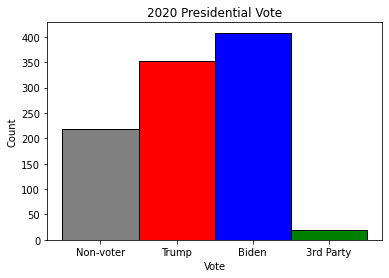

In [ ]:
sb.histplot(df_raw.vote, binwidth=1)
plt.xlabel("Vote")
b1 = plt.bar(0, 219, 1, color = "grey", edgecolor = "black")
b2 = plt.bar(1, 353, 1, color = "red", edgecolor = "black")
b3 = plt.bar(2, 408, 1, color = "blue", edgecolor = "black")
b4 = plt.bar(3, 20, 1, color = "green", edgecolor = "black")
plt.title("2020 Presidential Vote")

In [ ]:
np.unique(df.walz_approval, return_counts = True)

(array([0, 1, 2, 3, 4], dtype=int8), array([201, 166, 261, 239, 133]))

Text(0.5, 1.0, '2020 Presidential Vote')

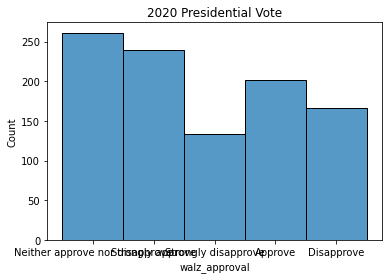

In [ ]:

sb.histplot(df_raw.walz_approval, binwidth=1, order = df.walz_approval)
plt.title("2020 Presidential Vote")

**Data Frame with Categorized Vote, and Walz Approval**

In [ ]:
df = df_raw
df.vote = pd.Categorical(df.vote)
df.vote = df.vote.cat.codes
df.walz_approval = pd.Categorical(df.walz_approval)
df.walz_approval = df.walz_approval.cat.codes
df.voter_party = pd.Categorical(df.voter_party)
df.voter_party = df.voter_party.cat.codes
df.voter_race = pd.Categorical(df.voter_race)
df.voter_race = df.voter_race.cat.codes
df.voter_urban = pd.Categorical(df.voter_urban)
df.voter_urban = df.voter_urban.cat.codes
df.loc[0:50,]
df.shape

(1000, 11)

Text(0.5, 1.0, 'Grouped by 2020 Presidential')

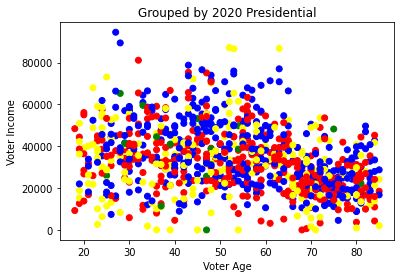

In [ ]:
colors = ["green", "blue", "yellow", "red"]
plt.scatter(df.voter_age, df.voter_income, c = df.vote, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel("Voter Age")
plt.ylabel("Voter Income")
plt.title("Grouped by 2020 Presidential")

In [ ]:
df.vote

0      2
1      3
2      3
3      3
4      1
      ..
995    1
996    3
997    2
998    2
999    3
Name: vote, Length: 1000, dtype: int8

In [ ]:
# Mapping: [0 -> 3rd Party, 1 -> Biden, 2 -> Non-voter, 3 -> Trump]
fig = px.scatter_3d(df, x='voter_age', y='voter_income', z='voter_race',
              color='vote', color_discrete_map = {0:"green", 1:"blue", 2:"grey", 3:"red"})
fig.show()

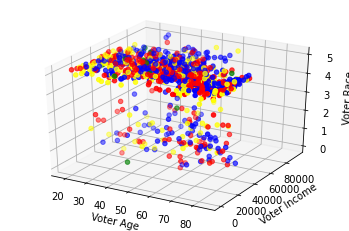

<Figure size 1120x1120 with 0 Axes>

In [ ]:
colors = ["green", "blue", "yellow", "red"]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.voter_age, df.voter_income, df.voter_race, c = df.vote, cmap=matplotlib.colors.ListedColormap(colors))

ax.set_xlabel('Voter Age')
ax.set_ylabel('Voter Income')
ax.set_zlabel('Voter Race')


figure(figsize=(14, 14), dpi=80)

plt.show()

Text(0.5, 1.0, 'Grouped by 2020 Walz Approval')

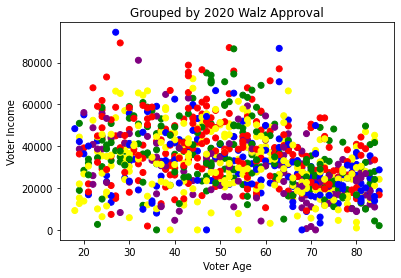

In [ ]:
colors = ["green", "blue", "yellow", "red", "purple"]
plt.scatter(df.voter_age, df.voter_income, c = df.walz_approval, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel("Voter Age")
plt.ylabel("Voter Income")
plt.title("Grouped by 2020 Walz Approval")

**Neural Net**

In [ ]:
trim = df.loc[:, "voter_party":"vote"]
df_normal = trim
df_normal.voter_age = (df_normal.voter_age - np.amin(df_normal.voter_age))/(np.amax(df_normal.voter_age) - np.amin(df_normal.voter_age))
df_normal.voter_income = (df_normal.voter_income - np.amin(df_normal.voter_income))/(np.amax(df_normal.voter_income) - np.amin(df_normal.voter_income))
nump = trim.values
categories = trim
categories = categories.drop(['voter_age', 'voter_income'], axis = 1)
nump2 = categories.values
nump_n = df_normal.values

**Categorical AND Continuous**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(nump[:,0:7], nump[:,8], test_size = 0.2)
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)
X_train.shape

(800, 7)

**ONLY Categorical**

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(nump2[:,0:5], nump2[:,6], test_size = 0.2)
y_train2_oh = to_categorical(y_train2)
y_test2_oh = to_categorical(y_test2)
y_train2.shape

(800,)

**Normalized Data**

In [ ]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(nump_n[:,0:7], nump_n[:,8], test_size = 0.2)
y_train_n_oh = to_categorical(y_train_n)
y_test_n_oh = to_categorical(y_test_n)
y_train_n_oh.shape

(800, 4)

**Cross Validation for Learning Rate Neighborhood**

In [ ]:
cv_models = []
lr = [ 10, 1, 0.1, 0.01, 0.001, 0.0001]
avg_train = []

for i in lr:
  model = keras.Sequential([
      keras.layers.Dense(34, activation='relu', use_bias=True),  # hidden layer (2)
      keras.layers.Dense(68, activation='relu', use_bias=True),
      keras.layers.Dense(4, activation='softmax') # output layer (4)
  ])

  opt = tf.optimizers.Adam(learning_rate= i)
  model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  history = model.fit(X_train_n, y_train_n_oh, epochs=500, verbose = 0)
  cv_models = np.append(cv_models, history)

In [ ]:
opt = tf.optimizers.Adam(learning_rate= 0.01)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_n, y_train_n_oh, epochs=500)

In [ ]:
for i in cv_models:
  print(np.mean(i.history['accuracy']))

0.35026500004529953
0.3738275000452995
0.49552750486135483
0.6636525002121926
0.5880499987006187
0.5500699966549873


**Neural Net 2**

**Cross Validated, 2 Layer**

In [ ]:
k = 5
kf = KFold(n_splits=k, random_state=None)
training_acc_score = []
testing_acc_score = []
models = []
X = nump_n[:,0:7]
y = to_categorical(nump_n[:,8])

model = keras.Sequential([
      keras.layers.Dense(16, activation='relu', use_bias=True),  # hidden layer (2)
      keras.layers.Dense(32, activation='relu', use_bias=True),  # hidden layer (3)
      keras.layers.Dense(4, activation='softmax') # output layer (4)
  ])

opt = tf.optimizers.Adam(learning_rate= 0.01)
model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

for train_index , test_index in kf.split(X):
    X_train , X_test = X[train_index,:], X[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    history = model.fit(X_train,y_train, epochs=500, verbose = 0)
    test_loss, test_acc = history.model.evaluate(X_test,  y_test, verbose=1)
    models.append(history.model)
    training_acc_score.append(np.mean(history.history['accuracy']))
    testing_acc_score.append(test_acc)
     
max_test_idx = np.argmax(testing_acc_score)
best_mod = models[max_test_idx]
avg_acc_score = sum(testing_acc_score)/k

7/7 [==============================] - 0s 2ms/step - loss: 2.3983 - accuracy: 0.5600
Training Accuracy for Each Fold:  [0.63860749822855, 0.67191000020504, 0.7021575005054473, 0.721724999666214, 0.7118575004339218]
Testing Accuracy for Each Hold Out:  [0.5099999904632568, 0.5, 0.5099999904632568, 0.5550000071525574, 0.5600000023841858]
5-Fold Cross Validated Accuracy: 0.5269999980926514
Best Model:  4


In [ ]:
print('Training Accuracy for Each Fold: ', training_acc_score)
print('Testing Accuracy for Each Hold Out: ', testing_acc_score)
print('5-Fold Cross Validated Accuracy: {}'.format(avg_acc_score))
print("Best Model: ", max_test_idx + 1)

Training Accuracy for Each Fold:  [0.63860749822855, 0.67191000020504, 0.7021575005054473, 0.721724999666214, 0.7118575004339218]
Testing Accuracy for Each Hold Out:  [0.5099999904632568, 0.5, 0.5099999904632568, 0.5550000071525574, 0.5600000023841858]
5-Fold Cross Validated Accuracy: 0.5269999980926514
Best Model:  5


**Single Layer Attemp**

In [ ]:
cv_models = []
lr = [ 10, 1, 0.1, 0.01, 0.001, 0.0001]
avg_train = []

# the number of neurons in that layer is the mean of the neurons in the input and output layers ((10 + 4) / 2 = 7)
# K / (m + n) = 800 / (10 + 4) = ~57 
for i in lr:
  model = keras.Sequential([
      keras.layers.Dense(57, activation='relu', use_bias=True),  # hidden layer (2)
      keras.layers.Dense(4, activation='softmax') # output layer (4)
  ])

  opt = tf.optimizers.Adam(learning_rate= i)
  model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  history = model.fit(X_train_n, y_train_n_oh, epochs=500, verbose = 0)
  print("Average Training Accuracy: ", np.mean(history.history['accuracy']))
  test_loss, test_acc = history.model.evaluate(X_test_n,  y_test_n_oh, verbose=1)
  print("Test Accuracy: ", test_acc)

Average Training Accuracy:  0.349850000500679
7/7 [==============================] - 0s 2ms/step - loss: 16.4847 - accuracy: 0.4000
Test Accuracy:  0.4000000059604645
Average Training Accuracy:  0.3754750000238419
7/7 [==============================] - 0s 2ms/step - loss: 1.2640 - accuracy: 0.4000
Test Accuracy:  0.4000000059604645
Average Training Accuracy:  0.529782502412796
7/7 [==============================] - 0s 3ms/step - loss: 1.2681 - accuracy: 0.5650
Test Accuracy:  0.5649999976158142
Average Training Accuracy:  0.5982624989748001
7/7 [==============================] - 0s 2ms/step - loss: 1.8935 - accuracy: 0.5350
Test Accuracy:  0.5350000262260437
Average Training Accuracy:  0.5735774967446923
7/7 [==============================] - 0s 2ms/step - loss: 1.1222 - accuracy: 0.5250
Test Accuracy:  0.5249999761581421
Average Training Accuracy:  0.5389724987410008
7/7 [==============================] - 0s 2ms/step - loss: 1.0480 - accuracy: 0.5700
Test Accuracy:  0.5699999928474426

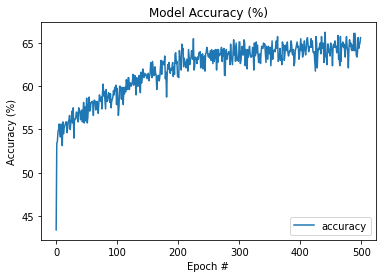

In [ ]:
  # Graphing: Epoch vs. Training Accuracy
  #plt.plot(history.history['accuracy'])
  plt.plot(np.multiply(history.history['accuracy'], 100))
  plt.title('Model Accuracy (%)')
  plt.ylabel('Accuracy (%)')
  plt.xlabel('Epoch #')
  plt.legend(['accuracy', 'loss'], loc='lower right')
  plt.show()

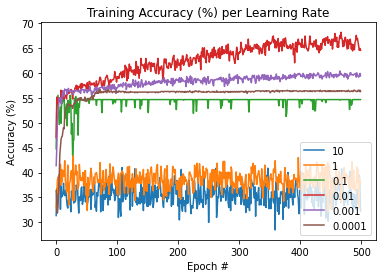

In [ ]:
for i in cv_models:
  plt.plot(np.multiply(i.history['accuracy'], 100))

plt.title('Training Accuracy (%) per Learning Rate')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch #')
plt.legend(['10', '1', '0.1', '0.01', '0.001', '0.0001'], loc='lower right')
plt.show()

7/7 [==============================] - 0s 4ms/step - loss: 1.0720 - accuracy: 0.5550


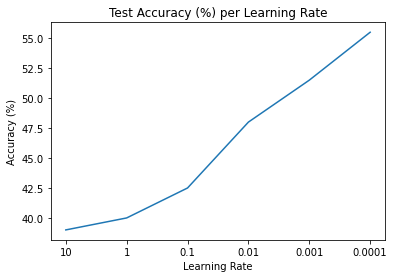

In [ ]:
test_accuracy = []
for i in cv_models:
  test_loss, test_acc = i.model.evaluate(X_test_n,  y_test_n_oh, verbose=1)
  test_accuracy = np.append(test_accuracy, test_acc*100)

xi = [i for i in range(0, len(lr))]
plt.plot(xi, test_accuracy)
plt.xticks(xi, lr)
plt.title('Test Accuracy (%) per Learning Rate')
plt.ylabel('Accuracy (%)')
plt.xlabel('Learning Rate')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test2,  y_test2_oh, verbose=1) 

ValueError: ignored

**Gaussian Naive Bayes**

In [ ]:
gnb = sklearn.naive_bayes.GaussianNB()
gnb_cat = gnb.fit(X_train2, y_train2).predict(X_test2)
gnb_mixed = gnb.fit(X_train, y_train).predict(X_test)
gnb_norm = gnb.fit(X_train_n, y_train_n).predict(X_test_n)
print("Error rate for Categorical Data: ", (y_test2 != gnb_cat).sum()/len(y_test2))
print("Error rate for Mixed Categorical/Continuous Data: ", (y_test != gnb_mixed).sum()/len(y_test))
print("Error rate for Normalized Mixed Data: ", (y_test_n != gnb_norm).sum()/len(y_test_n))

Error rate for Categorical Data:  0.925
Error rate for Mixed Categorical/Continuous Data:  0.49
Error rate for Normalized Mixed Data:  0.94


**Multinomial Naive Bayes**

In [ ]:
mnb = sklearn.naive_bayes.MultinomialNB()
mnb_cat = mnb.fit(X_train2, y_train2).predict(X_test2)
mnb_mixed = mnb.fit(X_train, y_train).predict(X_test)
mnb_norm = mnb.fit(X_train_n, y_train_n).predict(X_test_n)
print("Error rate for Categorical Data: ", (y_test2 != mnb_cat).sum()/len(y_test2))
print("Error rate for Mixed Categorical/Continuous Data: ", (y_test != mnb_mixed).sum()/len(y_test))
print("Error rate for Normalized Mixed Data: ", (y_test_n != mnb_norm).sum()/len(y_test_n))

Error rate for Categorical Data:  0.46
Error rate for Mixed Categorical/Continuous Data:  0.675
Error rate for Normalized Mixed Data:  0.405


**Categorical Naive Bayes**

In [ ]:
cnb = sklearn.naive_bayes.CategoricalNB()
cnb_cat = cnb.fit(X_train2, y_train2).predict(X_test2)
cnb_mixed = cnb.fit(X_train, y_train).predict(X_test)
cnb_norm = cnb.fit(X_train_n, y_train_n).predict(X_test_n)
print("Error rate for Categorical Data: ", (y_test2 != cnb_cat).sum()/len(y_test2))
print("Error rate for Mixed Categorical/Continuous Data: ", (y_test != cnb_mixed).sum()/len(y_test))
print("Error rate for Normalized Mixed Data: ", (y_test_n != cnb_norm).sum()/len(y_test_n))

Error rate for Categorical Data:  0.47
Error rate for Mixed Categorical/Continuous Data:  0.465
Error rate for Normalized Mixed Data:  0.42
